# Assignment #3 - Neural Networks

### <font color="red"> DUE: Apr 2 (Thursday) 11:00 pm </font>  

<font color="blue"> Narendra Kumar Vankayala </font>

# I. Overview

* In this assignment, I am going to use Neural Network for classification and Regression Datasets
* I will be importing the Neural Network class given for Non- Linear Regression and use it for Regression Dataset
* I will be implementing the Neural Network class for Non-Linear Logistic Regression and use it for Classification Dataset
* I will also implement k Fold corss validation to find out the best such as alpha parameters for the Neural Network
* The process of k fold cross validation is Leave One out method

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #1 (of course for regression). 

# Introduction to Data

* The dataset is a sample of the transactions made in a retail store on the event of Black Friday which occurs every year in the US.
* The store wants to know better the customer purchase behaviour against different products.
* The dataset has 537,577 observations and 12 features
* The dataset contains different kinds of variables either categorial or numerical
* The value which we infer is a dependent variable(the amount of purchase) with the help of the information contained in the other variables/features.

In [4]:
import numpy as np
import pdb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D

%matplotlib inline

## Preprocessing the Data

In [2]:
#The data is stored in a csv file named "BlackFriday.csv"
df_regression = pd.read_csv("BlackFriday.csv")

In [3]:
#checking if there are any nan values in the dataset for which we found "True"
np.any(df_regression.isna())

True

In [4]:
#checking for null values in the dataset
np.any(df_regression.isnull())

True

In [5]:
#sneak peak of the datatypes of all the features in the dataset
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
#looking at the first five samples of the dataset
df_regression.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
#summary of the dataset
df_regression.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [8]:
#finding the feature names in the dataset
df_regression.columns.values

array(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase'], dtype=object)

In [9]:
#Counting the number of features in the dataset
len(df_regression.columns)

12

In [10]:
#checking for which columns have empty values or no values
df_regression.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [17]:
#checking for the columns which has no values and counting number of such values
df_regression.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [11]:
#The shape of the dataset
df_regression.shape

(537577, 12)

In [12]:
 df_regression.drop(columns=['User_ID', 'Product_ID'], inplace=True)

* Since the User_ID and Product_ID are not relevant to which we are predicting becuase the every sample is a trasaction obeserved at the store so we are removing the Product_ID and User_ID features from the dataset

In [13]:
#filling the empty values with 0 
df_regression.fillna(value=0, inplace=True)

In [14]:
df_regression.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [15]:
cols_to_transform = [ 'Gender', 'Stay_In_Current_City_Years','Age', 'City_Category' ]
df_with_dummies = pd.get_dummies( df_regression,columns = cols_to_transform )
df_with_dummies.info()
blackFriday_T = df_with_dummies['Purchase']
blackFriday_X = df_with_dummies.drop(columns=['Purchase'])
len(blackFriday_X.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 23 columns):
Occupation                       537577 non-null int64
Marital_Status                   537577 non-null int64
Product_Category_1               537577 non-null int64
Product_Category_2               537577 non-null float64
Product_Category_3               537577 non-null float64
Purchase                         537577 non-null int64
Gender_F                         537577 non-null uint8
Gender_M                         537577 non-null uint8
Stay_In_Current_City_Years_0     537577 non-null uint8
Stay_In_Current_City_Years_1     537577 non-null uint8
Stay_In_Current_City_Years_2     537577 non-null uint8
Stay_In_Current_City_Years_3     537577 non-null uint8
Stay_In_Current_City_Years_4+    537577 non-null uint8
Age_0-17                         537577 non-null uint8
Age_18-25                        537577 non-null uint8
Age_26-35                        537577 non-null uint8
Age_3

22

* PreProcessing using *_One Hot Encoding_* of the categorical data is done above
* Preparing the data
    * blackFriday_X is the features variable for our regression analysis
    * blackFriday_Y is the target varialbe for our regression analysis

## Visualization of Data

(array([ 32175.,  57237., 130109., 104444.,  79179.,  24980.,  63928.,
         13437.,  29772.,   2316.]),
 array([  185. ,  2562.6,  4940.2,  7317.8,  9695.4, 12073. , 14450.6,
        16828.2, 19205.8, 21583.4, 23961. ]),
 <a list of 10 Patch objects>)

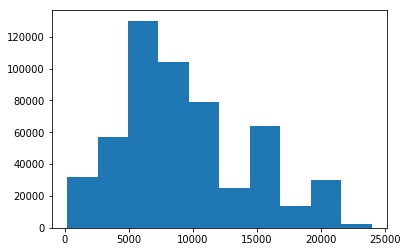

In [57]:
plt.hist(blackFriday_T)

(Text(0.5, 0, 'Occupation ID'), Text(0.5, 0, 'City id'))

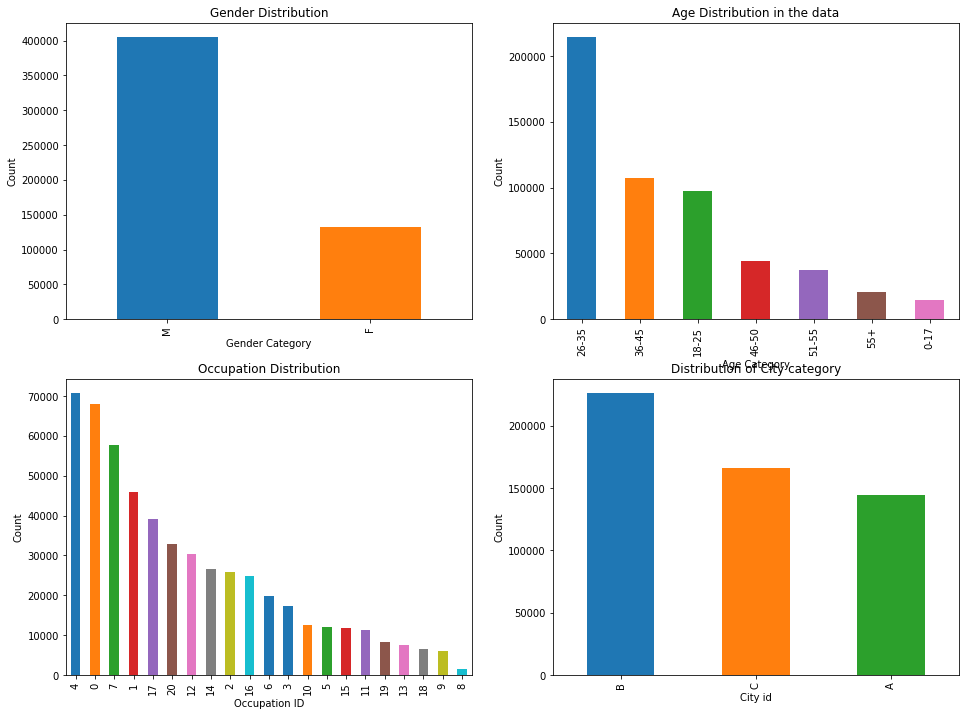

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2)

plt1 = df_regression['Gender'].value_counts().plot(ax=axes[0,0],kind='bar',title='Gender Distribution',figsize=(16,12))
df_regression['Age'].value_counts().plot(ax=axes[0,1],kind='bar',title='Age Distribution in the data',figsize=(16,12))
df_regression['Occupation'].value_counts().plot(ax=axes[1,0],kind='bar',title='Occupation Distribution',figsize=(16,12))
df_regression['City_Category'].value_counts().plot(ax=axes[1,1],kind='bar',title='Distribution of City category',figsize=(16,12))
axes[0][0].set_ylabel("Count"),axes[0][1].set_ylabel("Count")
axes[1][0].set_ylabel("Count"),axes[1][1].set_ylabel("Count")
axes[0][0].set_xlabel("Gender Category"),axes[0][1].set_xlabel("Age Category")
axes[1][0].set_xlabel("Occupation ID"),axes[1][1].set_xlabel("City id")

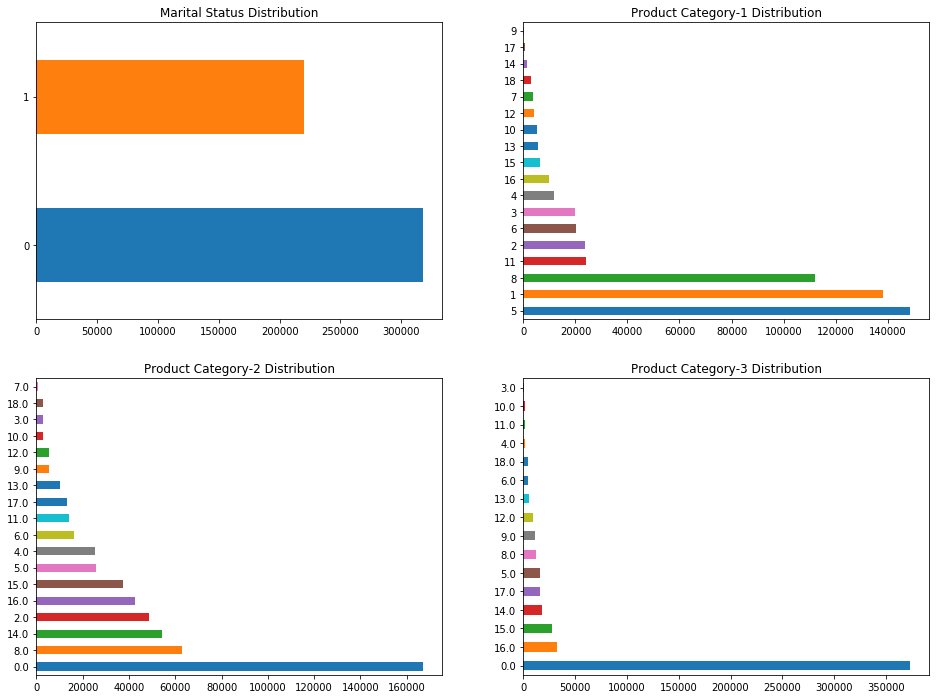

In [59]:
fig1, axes1 = plt.subplots(nrows=2, ncols=2)

df_regression['Marital_Status'].value_counts().plot(ax=axes1[0,0],kind='barh',title='Marital Status Distribution',figsize=(16,12))
df_regression['Product_Category_1'].value_counts().plot(ax=axes1[0,1],kind='barh',title='Product Category-1 Distribution',figsize=(16,12))
df_regression['Product_Category_2'].value_counts().plot(ax=axes1[1,0],kind='barh',title='Product Category-2 Distribution',figsize=(16,12))
df_regression['Product_Category_3'].value_counts().plot(ax=axes1[1,1],kind='barh',title='Product Category-3 Distribution',figsize=(16,12))

# df_regression['Stay_In_Current_City_Years'].value_counts().plot(ax=axes[2,0],kind='barh',title='Stay In Current City in Years',figsize=(16,12))

## Preliminary observation
<font color="green">* "Sample Plot title Name" - Observations Made ( This is a reference )</font>
#### The following are the observation made from the above plots
* "Gender Distribution Plot" - we can see male are in majority in the dataset 
* "Age Distribution Plot" - we can see age group (26-35) are in major in the dataset
* "Occupation Distribution Plot" - we can observe that occupation ID "4" are highest in number in the dataset and occupation id "0" are in next in number
* "City Distribution Plot" - we can see City id "B" are more in count at the store on Black Friday sales
* "Martial Status Distribution Plot" - we observe that there is more count of unmarried people at the store
* "Product Category -1 Distribution Plot" -we see that product id 5,1,8 occupy majority of the sales
* "Product Category - 2 Distribution Plot" - we found that highest number of product id is 0, which is unclassified. Since we have filled empty values as zero, we observe that in product category 2 many products which doesn't have any product id in the dataset were sold on black firday
* "Product Category -3 Distribution Plot" - we found the similar case as product category -2 which is most of the products does not have any product id were sold in major portion

# III. Methods

## III.A 5-fold Cross Validation

- Explain and use 5-fold cross validation to find a good neural network parameters including the structure to report the CV accuracies.


* In K-fold corss Validation, we split the data into k partitions
* We select the 1 partition as test data, 1 partition as validation data, and the remaining k-2 partitions as train data
* We train with k -2 partitioned train data and perform validation on validation data and we get k - 1 validation errors, we choose the minimum error and train on the hold out test data with the parameters we get
* similarly we do for every partition of k fold and we get test errors 
* We take average of all the test errors and we report that as our final error 

# Explanation of the Code

* In the following code I have implemented the function crossValidationKfold to take inputs as Input X and Input Y 
* The kwargs are optional keyword parameters where I am passing k, alpha
* I am holding out one test partition and one validation partition and remaining 3 as training data in one loop and finding the rmse for every validation and then chosing the best parameters I am picking that and training again on the train data to find the model.
* After that I am testing the best model on test data
* I am doing the above two steps in loop to find out the best parameters so that there wont be any bias in selecting the test data and to the model.

In [107]:
def rmse(T,Y):
    assert(T.shape==Y.shape)
    return np.sqrt((1/T.shape[0])*np.sum((Y-T)**2))

In [110]:
from nn import NeuralNet
def crossValidationKFold(X, Y, **kwargs):
    print(X.shape, Y.shape)
    k = kwargs.get('k', 5)
    alphas = kwargs.get('alpha', 0.001)
    maxIterations = 5
    
    inputSize = X.shape[0]
    split = int(inputSize/5)
    allIndexes = np.arange(inputSize)
    
    indexRanges = []
    
    for i in range(k):
        if i == k - 1:
            indexRanges.append(allIndexes[i*split:])
        else:
            indexRanges.append(allIndexes[i*split:(i+1)*split])
    
    # we will get index ranges 
    testErrs = []   
    for i in range(k):
        X_test = X[indexRanges[i]]
        Y_test = Y[indexRanges[i]]
        cv_errs = dict((alp, 0) for alp in alphas)
        for j in range(k):
            if j == i : 
                continue
            X_train = None
            Y_train = None
            X_CrossValidation = X[indexRanges[j]]
            Y_CorssValidation = Y[indexRanges[j]]
            for t in range(k):
                if i == t or j == t:
                    continue
                if X_train is None:
                    X_train = X[indexRanges[t]]
                    Y_train = Y[indexRanges[t]]
                    continue
                X_train = np.concatenate([X_train, X[indexRanges[t]]])
                Y_train = np.concatenate([Y_train, Y[indexRanges[t]]])
            for alp in alphas:
                NNReg = NeuralNet([X.shape[1], 8, 8, 1])
                print(X_train.shape, Y_train.shape)
                NNReg.train(X_train,Y_train, niter = maxIterations)
                
                YPred = NNReg.use(X_CrossValidation)
                err = rmse(YPred, Y_CorssValidation)
                cv_errs[alp] += err
                print(alp, err)
                
            print("Cross Validation Erros ", cv_errs )
        bestAlpha = alphas[np.argmin(cv_errs.values())]
        NNReg = NeuralNet([X.shape[1], 8, 8, 1])
        NNReg.train(X_train, Y_train, Lambda= bestAlpha, niter = maxIterations)
        YPred = NNReg.use(X_test)
        err = rmse(YPred, Y_test)
        testErrs.append([bestAlpha, err])
        print("Best Alpha is ",bestAlpha,"and the error is ",err )
    print("K fold Completed")
    return testErrs 

In [111]:
kfoldresult = crossValidationKFold( blackFriday_X.values,blackFriday_T,k = 5, alpha=[0.001,0.01,0.1,1])

(537577, 22) (537577, 1)
(322547, 22) (322547, 1)
0.001 4643.974413181192
(322547, 22) (322547, 1)
0.01 4807.324898604846
(322547, 22) (322547, 1)
0.1 4651.450684166343
(322547, 22) (322547, 1)
1 4801.916709387888
Cross Validation Erros  {0.001: 4643.974413181192, 0.01: 4807.324898604846, 0.1: 4651.450684166343, 1: 4801.916709387888}
(322547, 22) (322547, 1)
0.001 4619.440308958301
(322547, 22) (322547, 1)
0.01 4930.98099903802
(322547, 22) (322547, 1)
0.1 4701.126180832574
(322547, 22) (322547, 1)
1 4711.1347430464575
Cross Validation Erros  {0.001: 9263.414722139492, 0.01: 9738.305897642866, 0.1: 9352.576864998919, 1: 9513.051452434345}
(322547, 22) (322547, 1)
0.001 4629.116309805866
(322547, 22) (322547, 1)
0.01 4716.1915610455635
(322547, 22) (322547, 1)
0.1 4991.99540856034
(322547, 22) (322547, 1)
1 4765.824178156191
Cross Validation Erros  {0.001: 13892.531031945358, 0.01: 14454.49745868843, 0.1: 14344.572273559259, 1: 14278.875630590537}
(322545, 22) (322545, 1)
0.001 4897.348

* The following are the rmse values I got for different values of alpha

* Best Alpha is  0.001 and the error is  4826.879052733705
* Best Alpha is  0.001 and the error is  4872.097006366235
* Best Alpha is  0.001 and the error is  4651.083088529687
* Best Alpha is  0.001 and the error is  4625.781875375628
* Best Alpha is  0.001 and the error is  4704.20471332634

For all the hold out test alphas is same 0.001 and the errrs are above

In [102]:
CrossValidationErros =  {0.001: 3010.96232258746, 0.01: 3013.982901234816, 0.1: 3086.8510626808416, 1: 3033.130879328568}

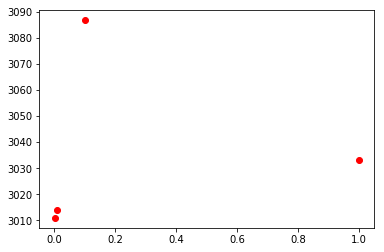

In [104]:
import matplotlib.pyplot as plt
alphas = [0.001, 0.01, 0.1, 1]
errs = [3010.9, 3013.9, 3086.8, 3033.1]
plt.plot(alphas, errs, 'ro')
plt.show()

## III.B Nonlinear Regression 

* Neural Network functioning is similar to brain where it consists of neurons and synapses
* The perceptron model is simplest of all
* In perceptron, passing the output of linear model to the step functio, we get discrete outputs. We can assume this as a neuron. 
* The linear model outputs are passed over to next layer as a linear combination.
* In Non-Linear Regression, weights affect the outputs. If the function is not linear with respect to the weights, then it's non linear regression problem
* It contains a feed forward neural network and hidden layers and the output layer
* I am taking the implemented NN and passing the toy data and regression data
* Add Ones is adding bias values in every layer
* n_getLayer is getting number of layers
* pack will make single vector fromlayers units weights by stacking
* Unpack will do the reverse as above
* cp_weight copy the weight
* Forward method is forward processing of neural network
* train methodi is to train the neural network
* use method is for applying the trained neural network

In [28]:
import numpy

In [29]:
X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

In [30]:
from nn import NeuralNet

In [31]:
nnsample = NeuralNet([2,3,2])
nnsample.train(X,T, wprecision=1e-20, fprecision=1e-2)
Y = nnsample.use(X)

In [33]:
Y

array([[0.49407939, 0.49454634],
       [0.49291355, 0.501562  ],
       [0.50764497, 0.49837792],
       [0.50651074, 0.50522267]])

In [34]:
NN = NeuralNet([22, 64 , 1])

In [35]:
blackFriday_T =np.atleast_2d(blackFriday_T).T

In [37]:
blackFriday_X.shape, blackFriday_T.shape

((537577, 22), (537577, 1))

In [38]:
NN.train(blackFriday_X.values, blackFriday_T)

{'w': array([-0.32808447, -0.10132642, -0.22714333, ..., -3.65605258,
        -0.10640853, -3.23763378]),
 'f': 0.18010782873599085,
 'reason': 'reached limit of nIterations',
 'wtrace': None,
 'ftrace': None}

In [39]:
import pickle

In [42]:
filename = 'finalized_model.sav'
pickle.dump(NN, open(filename, 'wb'))

In [43]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.use(blackFriday_X.values)

In [53]:
from sklearn import metrics

In [54]:
rmse_reg = np.sqrt(metrics.mean_squared_error(blackFriday_T, result))

In [55]:
rmse_reg

2989.5055272325467

* With the given parameters I got an RMSE valus of 2989.5
* Here I have stored the model to avoid retraining the model as it takes lot of time to retrain the model

## III.C Nonlinear Logistic Regression

- Summarize the nonlinear logistic regression model. 
- Finish the following NeuralNetLogReg class.
- Check if your codes works well with toy synthetic data. 
- Apply to your classification data. 
- Explain your codes (not in comment)

* Logisitc Regression contains an activation function
* It's a special type of Regression in which the goal is to mdel the probability of something as a function of other variables. 
* It estimates the probability (p) of an event occuring (y=1) rather then not occuring (y=0) form the knowledge of independent variables or features
* Regression coefficients are estimated using maximum likelihood estimation
* I use negative log likelihood estimate here for Non linear logistic regression



# Explanation of the Code

* In NeuralNetLogReg class below, the init method initializes all parameters such as hidden units, input size and hidden layers and output size. 
* Forward method in the class forwards with combination of the inputs 
* The objectf is the error function which is log likelihood functin which we will back propogate and update the weights
* The train method make use of the objectF and train the model accordingly
* Use method uses the trained weights and gives the predicted values
* Add activation layer in forward function
* Added encoding in the train method
* use function, I have calcualted the probabiliteis and returned the arg max of labels
* Changed the error function as in lecture notes

In [5]:
from nn import NeuralNet
from util import Standardizer
from copy import copy
from grad import scg

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def _init_(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end
            
        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                a = (np.exp(t)) / (np.sum(np.exp(t), axis=1, keepdims=True) if len(X.shape) == 2 else np.sum(np.exp(t)))
                t = a
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return np.mean(-(np.add(np.dot(T, np.log(Y).T),np.dot(1-T,np.log(1-Y).T)))) + wpenalty
    
    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        targetLength = len(T)
        newT = T.astype(int).ravel()
        T = np.zeros((targetLength, 2))
        T[np.arange(targetLength),newT.astype(int)] = 1
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.01)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
            
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result
    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X, retZ = False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        #if self.stdT is not None:
            #Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        label = []
        for i in range(len(Y)):
            if Y[i][0] > Y[i][1]:
                label.append(0)
            else:
                label.append(1)
        return Y,label

# Test on Toy Data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nn 

Text(0.5, 1.0, 'test data set')

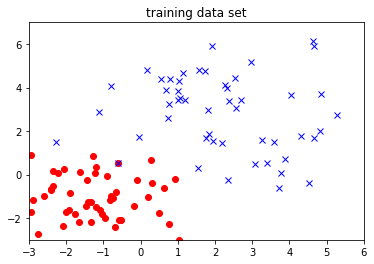

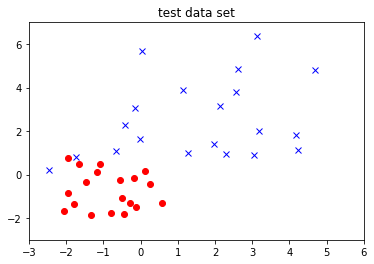

In [7]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [8]:
# Apply Nonlinear Logistic Regression
# from imp import reload
# reload(nn)
#import warnings 
#warnings.filterwarnings('ignore')

clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
Y, classes = clsf.use(Xtest)

C:\Users\nvankay1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


In [9]:
classes

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1]

In [10]:
Y

array([[0.51400125, 0.48599875],
       [0.52051374, 0.47948626],
       [0.51636681, 0.48363319],
       [0.52646468, 0.47353532],
       [0.51595692, 0.48404308],
       [0.51942024, 0.48057976],
       [0.5235296 , 0.4764704 ],
       [0.51521012, 0.48478988],
       [0.52227102, 0.47772898],
       [0.52250118, 0.47749882],
       [0.52207012, 0.47792988],
       [0.52380514, 0.47619486],
       [0.52053793, 0.47946207],
       [0.51441295, 0.48558705],
       [0.51887165, 0.48112835],
       [0.5179087 , 0.4820913 ],
       [0.52010442, 0.47989558],
       [0.51588899, 0.48411101],
       [0.51550447, 0.48449553],
       [0.51452403, 0.48547597],
       [0.49354141, 0.50645859],
       [0.48718138, 0.51281862],
       [0.51148292, 0.48851708],
       [0.508174  , 0.491826  ],
       [0.5073401 , 0.4926599 ],
       [0.50009335, 0.49990665],
       [0.5092256 , 0.4907744 ],
       [0.50345307, 0.49654693],
       [0.49095837, 0.50904163],
       [0.50483357, 0.49516643],
       [0.

Accuracy:  65.0 %


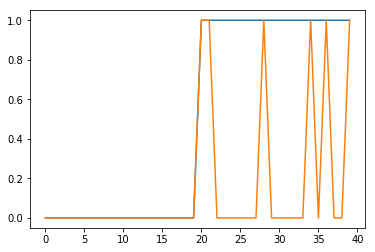

In [11]:
# retrieve labels and plot

plt.plot(Ttest)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(classes - Ttest.ravel())) * 100, "%")

# Non Linear Logistic Regression On classification Data

# Data

This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the article is popular or not by with a threshold on number of shares in social networks (popularity).
The articles were published by Mashable (www.mashable.com)
The dataset doesn't containt the content as the rights to reproduce it belongs to them.
The dataset does not share the original content but some statistics associated with it.
The original content can be publicly accessed and retrieved using the provided urls in the dataset.
The dataset is aquired on January 8, 2015

In [12]:
df = pd.read_csv("OnlineNewsPopularity.csv")


In [13]:
df.columns = df.columns.str.strip()


In [14]:
df['popularity'] = np.where(df['shares'] > 1400 , 1, -1)


In [15]:
df_updated  = df.copy()


In [16]:
df_updated.drop(['shares','url','timedelta'], axis=1, inplace=True)


In [17]:
df_updated.columns.values


array(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rat

In [18]:
T = df_updated['popularity']

In [19]:
X = df_updated.copy()


In [20]:
X.drop(['popularity'], axis=1, inplace=True)
X.columns.values

array(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rat

In [21]:
X.shape, T.shape

((39644, 58), (39644,))

In [22]:
T =np.atleast_2d(T).T

In [23]:
T.shape

(39644, 1)

In [24]:
nnlog = NeuralNetLogReg([X.shape[1], 4,4,2])

In [ ]:
nnlog.train(X.values, T)

D:\Semester2\MachineLearning\MachineLearning\CourseWork_UNCC\NarendraKumar_Vankayala_Assignment3\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma


# IV - Results

* For Non Linear Logistic Regression, The best aplha is 0.001 

* We got testErrs from above and we plot the test erros with best validation parameters
* Best Alpha is 0.001 and the error is 4826.879052733705
* Best Alpha is 0.001 and the error is 4872.097006366235
* Best Alpha is 0.001 and the error is 4651.083088529687
* Best Alpha is 0.001 and the error is 4625.781875375628
* Best Alpha is 0.001 and the error is 4704.20471332634

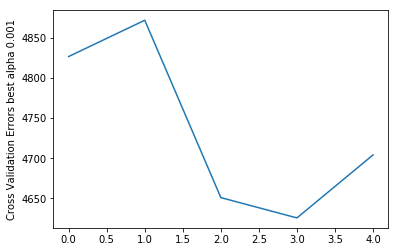

In [28]:
import matplotlib.pyplot as plt
plt.plot([4826.8,4872.0,4651.0, 4625.7, 4704.2])
plt.ylabel('Cross Validation Errors best alpha 0.001')
plt.show()

Here we can see that the best RMSE we got is for 3rd split and the RMSE is 4625.7

For different CV I am plotting as I iterated through the test split above

In [31]:
CV1 = [{0.001: 18789.879340206964, 0.01: 19128.271315385926, 0.1: 19247.22139620486, 1: 18997.87608073883},
      {0.001: 18635.957555796456, 0.01: 18779.847781797896, 0.1: 18851.543722754795, 1: 19071.452550924994},
      {0.001: 19231.528322020804, 0.01: 18953.063613079907, 0.1: 18910.20715905115, 1: 19140.618336962543},
      {0.001: 19004.609770150928, 0.01: 19346.318530563847, 0.1: 19047.6126733867, 1: 19132.846684452732},
      {0.001: 18927.56652270884, 0.01: 18893.42864071831, 0.1: 19458.116084803078, 1: 18997.583947193867}
      ]

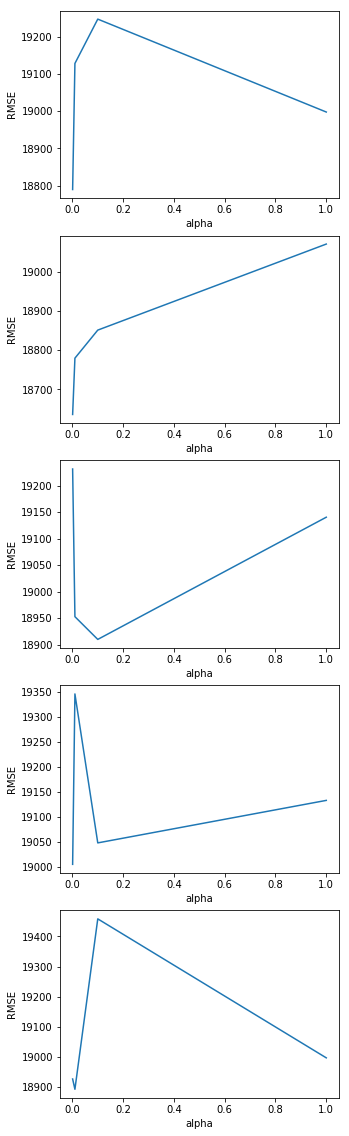

In [37]:
i = 0
plt.figure(figsize=(5,20))

for cv in CV1:
    i+=1
    plt.subplot(5,1,i)
    plt.plot(cv.keys(), cv.values())
    plt.ylabel("RMSE")
    plt.xlabel("alpha")

* Here we can see the cross validation errors for different values of alpha 0.001, 0.01, 0.1, 1

# Discussions about parameter/network structure choice

* In the None linear logistic regression I have chosen Number of hidden layers as 2 and hidden layers 8 as the datasize is huge for regression to avoid huge computational overhead in the initial setup
* The more the number of hidden units and iterations doesnot helpful as after some point the results will have no significant difference after convergence
* The more the number of layers stacked, the more the computational cost and it becomes deep neural network
* After iterating through different values of lambda, we can also find the best aplha or lambda. As you can see I got the best lambda at 0.001
* I got the best RMSE after cross validation as 4625.7

# Discussion about the prediction results. Try to analyze what nonlinear regression model learned

* The most important part of neural network is to find the number of hidden units which might give us the best model
* While there is no hard and fast rule for it, with multiple combination and training rigorously we should be able to find the best fit for hidden layers too
* Here we can see with different values of alpha we are able to find different rmse values through which we can best parameters for our model
* We hae to choose the activation function according to our data and type of data. 
* Feed forward and back propogation after every iteration, the weights will get updated to find the local minimum.
* As we can see the updation of weights in the intial iteration stages are updated trying to reach the best state possible, but after some threshold iterations the weights are not updated as much as it has initially due to the fact that it has learnt enough from the dataset
* So if even if we keep huge iteration, it's just a overhead of computational cost, so we need to find the best number of iterations possible too
* Got the best aplha as 0.001

# Conclusions

* Learnt about Neural Networks and implementation
* Learnt about how None Linear Neural Nets work
* Internal logic and flow of gradient descent and back propogation and feed forward networks
* Learnt about K fold cross validation implementation and how it can be used to predict the best parameteres for the model
* Also, about K fold cross validation and how fine tuning the parameters will help overfitting and underfitting
* Comparision of Non Linear Regerssion and Non Linear Logistic regression with how different activation functions can make difference

# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 


# How to start?

* Download [a3.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a3.tgz). 
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
